# Introduction to Astropy: III. Fits Tables

## Table of Content


III. [Fits Tables](#III.-Fits-Tables)
- III.1 [Example](#III.1-Example)
- III.2 [What if my table is not fits format?](#III.2-What-if-my-table-is-not-fits-format-?)

XX. [References](#XX-References)


In [5]:
# As usual, we start with some imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

## III. Fits Tables

### III.1 Example

We can proceed as for images to see the content of the file.  

Here, we will use a big fits table corresponding to a Chandra X-ray observation "chandra_events.fits". Since the file is big, we will open with `memmap=True` to prevent RAM storage issues.

In [6]:
event_filename = 'chandra_events.fits'
hdu_list = fits.open(event_filename, memmap=True)
hdu_list.info()

Filename: chandra_events.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  EVENTS        1 BinTableHDU    890   483964R x 19C   [1D, 1I, 1I, 1J, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           3 BinTableHDU     28   1R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     28   1R x 2C   [1D, 1D]   
  4  GTI           1 BinTableHDU     28   1R x 2C   [1D, 1D]   
  5  GTI           0 BinTableHDU     28   1R x 2C   [1D, 1D]   
  6  GTI           6 BinTableHDU     28   1R x 2C   [1D, 1D]   


We are interested in reading `EVENTS`, which contains information about each X-ray photon that hit the detector. 

We see in the `Dimensions` columns of the output of `info` that the different HDU (from the second one) contains a certain number of "rows" (`R`) and "columns" (`C`). You can print the column name simply using the attribute `columns` : 

In [7]:
hdu_list[1].columns

ColDefs(
    name = 'time'; format = '1D'; unit = 's'
    name = 'ccd_id'; format = '1I'
    name = 'node_id'; format = '1I'
    name = 'expno'; format = '1J'
    name = 'chipx'; format = '1I'; unit = 'pixel'; coord_type = 'CPCX'; coord_unit = 'mm'; coord_ref_point = 0.5; coord_ref_value = 0.0; coord_inc = 0.023987
    name = 'chipy'; format = '1I'; unit = 'pixel'; coord_type = 'CPCY'; coord_unit = 'mm'; coord_ref_point = 0.5; coord_ref_value = 0.0; coord_inc = 0.023987
    name = 'tdetx'; format = '1I'; unit = 'pixel'
    name = 'tdety'; format = '1I'; unit = 'pixel'
    name = 'detx'; format = '1E'; unit = 'pixel'; coord_type = 'LONG-TAN'; coord_unit = 'deg'; coord_ref_point = 4096.5; coord_ref_value = 0.0; coord_inc = 0.00013666666666667
    name = 'dety'; format = '1E'; unit = 'pixel'; coord_type = 'NPOL-TAN'; coord_unit = 'deg'; coord_ref_point = 4096.5; coord_ref_value = 0.0; coord_inc = 0.00013666666666667
    name = 'x'; format = '1E'; unit = 'pixel'; coord_type = 'RA---TAN'; c

To access the table data (content of the columns) you can follow the same procedure as for images, with the possibility to select a specific column:

In [8]:
event_data = hdu_list[1].data

In [9]:
type(event_data)

astropy.io.fits.fitsrec.FITS_rec

I can now for example plot a histogram of the events energy:

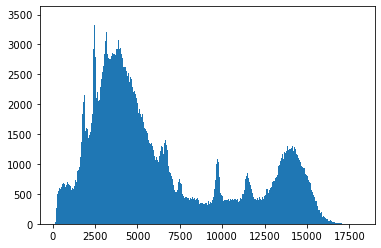

In [10]:
he = plt.hist(event_data['energy'], bins=500)
plt.show()

In [11]:
# We ca now close the fits file
hdu_list.close()

### III.2 What if my table is not fits format ? 

Astropy provides a unified interface for reading and writing data in different formats. For many common cases this will simplify the process of file I/O and reduce the need to master the separate details of all the I/O packages within Astropy. 

In [12]:
# A quick example
from astropy.table import Table
t = Table.read('SNdata.txt', format='ascii')


In [13]:
t[0:10]

z,mu,sig_mu
float64,float64,float64
0.5742,41.5085,0.9524
0.7394,44.1635,0.9659
0.6223,43.2775,0.9566
0.5708,41.14,0.9521
0.4736,43.5136,0.9422
0.664,44.8253,0.9601
0.4843,43.2816,0.9434
1.04,44.0385,0.9843
1.344,43.8425,0.9982


In [14]:
t[2]['z']

0.6223

Note that this also works with reading/writing `tex` formats ! 

You should consult those two "docs" to know more about `Table` objects in astropy:   

http://docs.astropy.org/en/stable/io/unified.html#table-io

http://docs.astropy.org/en/stable/table/io.html

## Credits:

If you use Astropy directly—or as a dependency to another package—for your work, please remember to include the following acknowledgment at the end of papers:

*This research made use of Astropy, a community-developed core Python package for Astronomy (Astropy Collaboration, 2013).*

Where the astropy paper is 2013, A&A, 558, 33 http://adsabs.harvard.edu//abs/2013A%26A...558A..33A

## XX References

This notebook is mostly based on the astropy tutorials available here: http://www.astropy.org/astropy-tutorials/

- Your reference for using astropy should be the online documentation http://docs.astropy.org/en/latest

- Documentation regarding the wcs module: http://docs.astropy.org/en/stable/visualization/wcsaxes/

- Documentation regarding the use of coordinates: http://docs.astropy.org/en/stable/coordinates/index.html

- The doc of astropy.io.fits also provides relevant information: http://docs.astropy.org/en/stable/io/fits/#f1

- Calabreta and Greisen 2002, A&A 395, 1077, Representations of celestial coordinates in FITS http://adsabs.harvard.edu/abs/2002A%26A...395.1077C

- Regarding `Table` objects and dealing with various i/o within astropy, you should consult those chapters of the doc: http://docs.astropy.org/en/stable/io/unified.html#table-io  and http://docs.astropy.org/en/stable/table/io.html 

- For an in-depth discussion of `Quantity` objects, see the [astropy documentation section](http://docs.astropy.org/en/stable/units/quantity.html). See also http://docs.astropy.org/en/stable/units/ for various informations of interest regarding the use of units in general !

- How bad is your color map ? (aka how not to be fooled by a poor choice of color map): https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/

- Github link to astropy tutorial notebooks: https://github.com/astropy/astropy-tutorials/tree/master/tutorials/